<a href="https://colab.research.google.com/github/Jaseelkt007/ML/blob/master/Computer_vision_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicing Basic Computer vision topics

# Edge detection using Linear diffusion filter : using Laplacian kernal
### Idea = rate of change of concentration at any point = Laplacian of image intensity at a pixel, which is done by second derivative of image intensity along x and y axis. --> shows rapid intensity changes

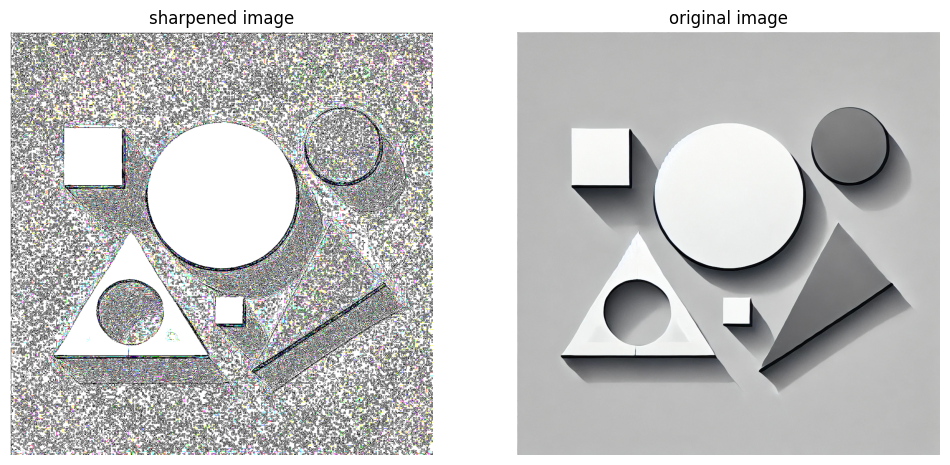

In [3]:
from scipy.ndimage import convolve
import numpy as np
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

up_image_path = '/content/IMG_123.png'
img = Image.open(up_image_path)



img_array = np.array(img)

def linear_diffusion(img_array, alpha):
    laplace_kernel = np.array([[1,4,1],
                       [4,-20,4],
                       [1,4,1],
                       ])*(1/6)
    lapla_img = np.zeros_like(img_array)
    for c in range(3):
        # adding this laplacian back to the original image enhances the edges
        lapla_img[:, :, c] = convolve(img_array[:,:,c], laplace_kernel, mode='reflect')
    # sharpen the image by adding the laplacian to the original image
    sharpened_img = img_array - alpha * lapla_img
        #print("convolution is hapening")
    sharpened_img = np.clip(sharpened_img, 0,255)
    return sharpened_img

diffused_arry = linear_diffusion(img_array, alpha =0.9)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("sharpened image")
plt.imshow(diffused_arry)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("original image")
plt.imshow(img_array)
plt.axis('off')

plt.show()


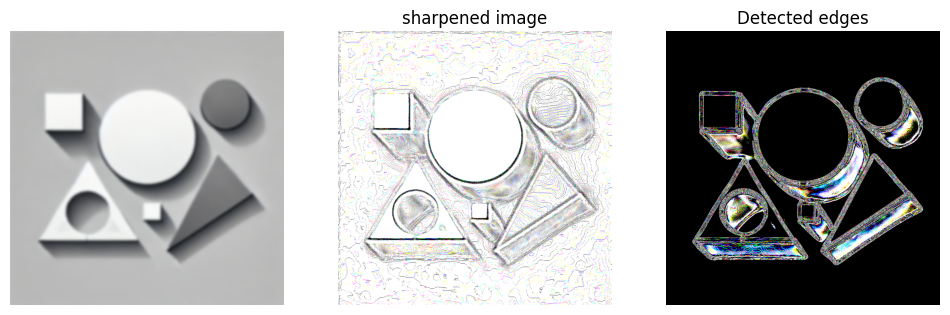

In [13]:
# Now using Guassian kernal for smoothing
import scipy.ndimage as ndimage
from scipy.ndimage import sobel

def guassian_blur(image , sigma= 1):
    # create a guassian kernal based on the sigma provide
    # scipy creates the kernel
    blurred_img = np.zeros_like(image)
    for c in range(image.shape[2]):
        blurred_img[:,:,c] = blurred_img[:,:,c] + ndimage.gaussian_filter(image[:,:,c] , sigma=sigma)
    return blurred_img

sigma = 5 # variance
image = img_array
blurred_img = guassian_blur(image , sigma=sigma) # blur the image reduce noise and high frequency components(avoid aliasing)

def compute_gradient_magnitude(image):
    dx = np.zeros_like(image)
    dy = np.zeros_like(image)
    for c in range(image.shape[2]):
        dx[:,:,c] = sobel(image[:,:,c], axis = 0) # along x direction
        dy[:,:,c] = sobel(image[:, :, c], axis = 1) # along y direction
    # Compute the magnitude of the gradient
    mag = np.sqrt(dx**2 + dy**2)
    return mag

def apply_threshold(mag, threshold = 50):
    # Apply a threshold to gradient maginture, then multiply by 255 for pixel values
    return (mag > threshold).astype(np.float32) *255

threshold = 11
gradient_mag = compute_gradient_magnitude(blurred_img)
edges = apply_threshold(gradient_mag, threshold=threshold)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(blurred_img)
plt.axis('off')

diffused_arry = linear_diffusion(blurred_img, alpha = .9)
plt.subplot(1,3,2)
plt.title("sharpened image")
plt.imshow(diffused_arry)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edges, cmap='gray')
plt.title("Detected edges")
plt.axis('off')

plt.show()


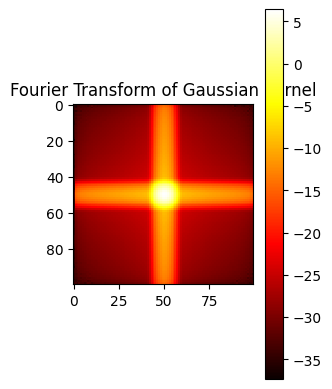

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma = 10  # Standard deviation for Gaussian
size = 100  # Size of the Gaussian kernel

# Spatial domain: Create a Gaussian kernel
x = np.linspace(-size // 2, size // 2, size)
y = np.linspace(-size // 2, size // 2, size)
x, y = np.meshgrid(x, y)
gaussian = np.exp(-(x**2 + y**2) / (2 * sigma**2))

#def guassian_blur(image , sigma= 1.0):
    # create a guassian kernal based on the sigma provide
    # scipy creates the kernel
   # blurred_img = np.zeros_like(image)
    #for c in range(image.shape[2]):
        #blurred_img[:,:,c] = blurred_img[:,:,c] +
   # return blurred_img

sigma = 5 # variance
image = img_array
blurred_img = guassian_blur(image , sigma=sigma)

# Frequency domain: Compute the Fourier Transform
from numpy.fft import fftshift, fft2
gaussian_ft = fftshift(fft2(gaussian))


plt.subplot(122)
plt.imshow(np.log(abs(gaussian_ft)), cmap='hot', interpolation='nearest')
plt.title('Fourier Transform of Gaussian Kernel')
plt.colorbar()

plt.show()

In [ ]:
 import numpy as np
 A = np.array([[0,0,0,0,0],
               [0,0,0,0,0],
               [5,5,0,0,0],
               [5,5,0,0,0],
               [5,5,0,0,0]])
 C =[]
 D = []
 J = []
 B = A[1:4,1:4]
 for i in range(4):
    for j in range(4):
        if i > 0 and j>0:
            c = (A[i, j+1] - A[i,j-1])/2
            #print(f"fx[{j},{i}] = (A[{i}, {j+1}]- A[{i},{j-1}])/2 = {c}")
            d = (A[i+1,j] - A[i-1,j])/2
            #print(f" fy[{j},{i}] = ( A[{i+1},{j}] - A[{i-1},{j}])/2 = {d}")
            print(f"J[{j},{i}] = [{c**2} , {c*d}],[{c*d}, {d**2}]")
            C.append(c)
            D.append(d)
            #print(f"i is {i} and j is {j}")
print(C)
print(D)

J[1,1] = [0.0 , 0.0],[0.0, 6.25]
J[2,1] = [0.0 , 0.0],[0.0, 0.0]
J[3,1] = [0.0 , 0.0],[0.0, 0.0]
J[1,2] = [6.25 , -6.25],[-6.25, 6.25]
J[2,2] = [6.25 , -0.0],[-0.0, 0.0]
J[3,2] = [0.0 , 0.0],[0.0, 0.0]
J[1,3] = [6.25 , -0.0],[-0.0, 0.0]
J[2,3] = [6.25 , -0.0],[-0.0, 0.0]
J[3,3] = [0.0 , 0.0],[0.0, 0.0]
[0.0, 0.0, 0.0, -2.5, -2.5, 0.0, -2.5, -2.5, 0.0]
[2.5, 0.0, 0.0, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0]
